✅ Jumlah gambar terbaca: 153 dari 3 kelas
Data latih: 122
Data uji: 31

🎯 Akurasi Model Random Forest: 96.77%

=== Classification Report ===
              precision    recall  f1-score   support

 Daun_Nangka       1.00      0.91      0.95        11
  Daun_Sirih       1.00      1.00      1.00        12
      Nangka       0.89      1.00      0.94         8

    accuracy                           0.97        31
   macro avg       0.96      0.97      0.96        31
weighted avg       0.97      0.97      0.97        31



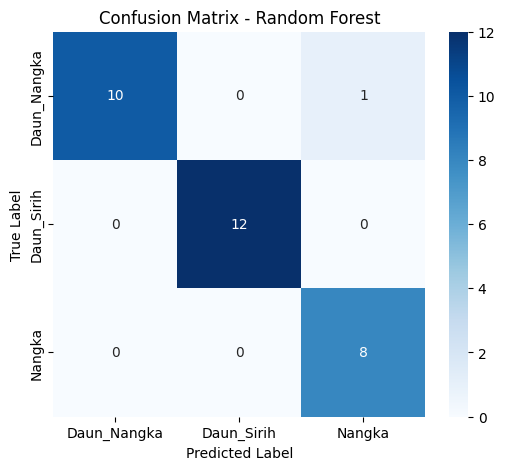

C:\Users\BAYU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


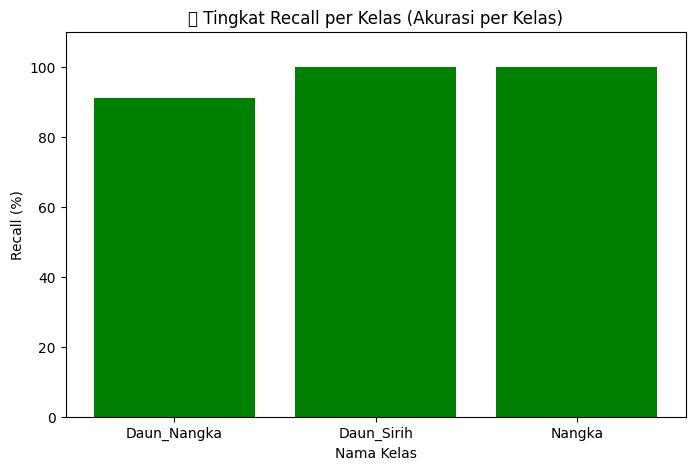

C:\Users\BAYU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


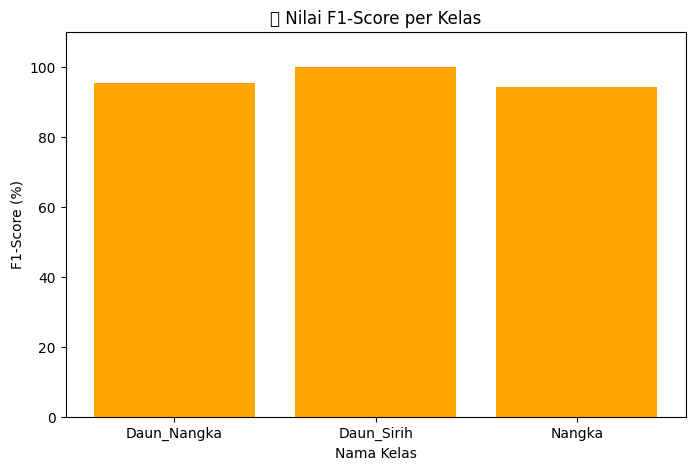

C:\Users\BAYU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


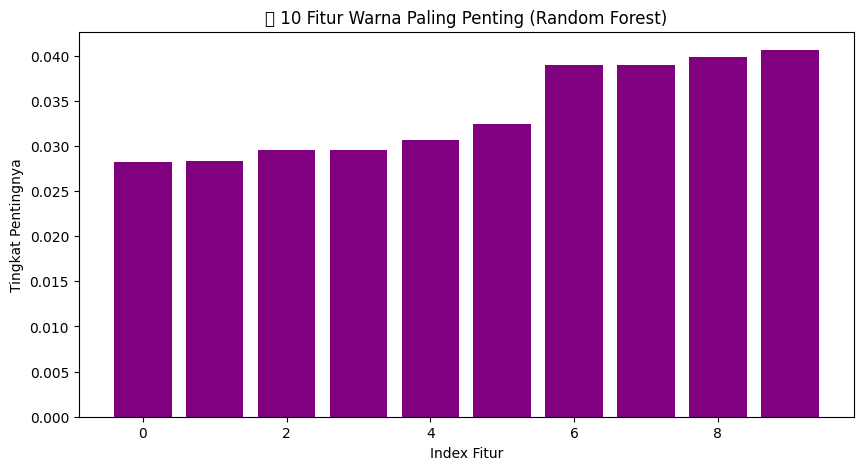

C:\Users\BAYU\AppData\Local\Temp\ipykernel_19500\2707720104.py:133: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



Contoh 5 hasil prediksi:
1. Prediksi: Daun_Sirih | Asli: Daun_Sirih
2. Prediksi: Daun_Sirih | Asli: Daun_Sirih
3. Prediksi: Daun_Sirih | Asli: Daun_Sirih
4. Prediksi: Nangka | Asli: Nangka
5. Prediksi: Daun_Nangka | Asli: Daun_Nangka

📸 Menampilkan beberapa contoh gambar hasil prediksi...


C:\Users\BAYU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


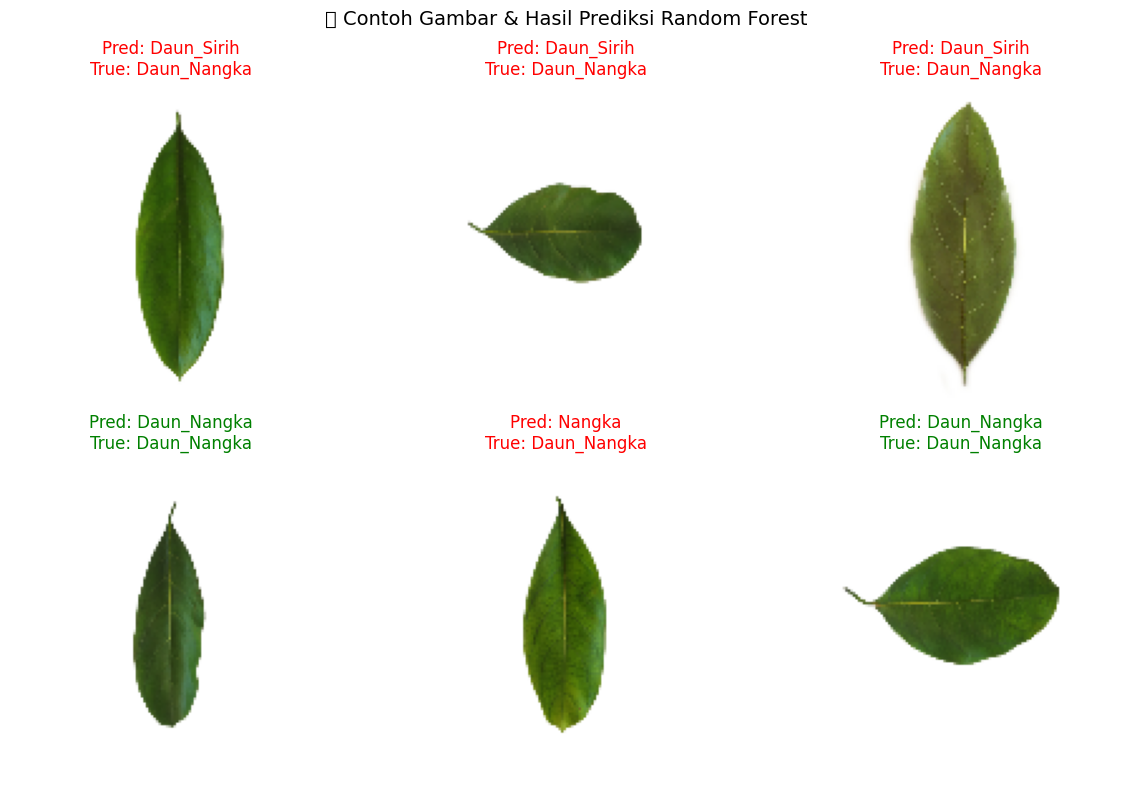

In [4]:
# === Import Library ===
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import joblib
import random

# === Path ke dataset ===
data_dir = "dataset"

if not os.path.exists(data_dir):
    raise FileNotFoundError("⚠️ Folder 'dataset' tidak ditemukan. Pastikan folder tersebut ada di direktori proyek.")

# === Membaca gambar dan mengekstraksi fitur warna (histogram RGB) ===
labels = []
features = []
images = []  # simpan gambar untuk visualisasi

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, (128, 128))
        hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8],
                            [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        features.append(hist)
        labels.append(folder)
        images.append((img, folder))  # simpan (gambar, label_asli)

print(f"✅ Jumlah gambar terbaca: {len(features)} dari {len(set(labels))} kelas")

# === Ubah ke format NumPy array ===
X = np.array(features)
y = np.array(labels)

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data latih:", len(X_train))
print("Data uji:", len(X_test))

# === Inisialisasi dan latih model Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === Prediksi ===
y_pred = rf.predict(X_test)

# === Evaluasi ===
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Model Random Forest: {acc * 100:.2f}%\n")
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Grafik 1: Akurasi per Kelas ===
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(8,5))
plt.bar(np.unique(y), recall * 100, color='green')
plt.title("📊 Tingkat Recall per Kelas (Akurasi per Kelas)")
plt.ylabel("Recall (%)")
plt.xlabel("Nama Kelas")
plt.ylim(0, 110)
plt.show()

# === Grafik 2: F1-Score per Kelas ===
plt.figure(figsize=(8,5))
plt.bar(np.unique(y), f1 * 100, color='orange')
plt.title("📈 Nilai F1-Score per Kelas")
plt.ylabel("F1-Score (%)")
plt.xlabel("Nama Kelas")
plt.ylim(0, 110)
plt.show()

# === Grafik 3: Feature Importance dari Random Forest ===
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Ambil 10 fitur paling penting

plt.figure(figsize=(10,5))
plt.bar(range(len(indices)), importances[indices], color='purple')
plt.title("🔥 10 Fitur Warna Paling Penting (Random Forest)")
plt.xlabel("Index Fitur")
plt.ylabel("Tingkat Pentingnya")
plt.show()

# === Tampilkan hasil prediksi contoh ===
print("\nContoh 5 hasil prediksi:")
for i in range(min(5, len(y_pred))):
    print(f"{i+1}. Prediksi: {y_pred[i]} | Asli: {y_test[i]}")

# === Tampilkan contoh gambar hasil prediksi (visual) ===
print("\n📸 Menampilkan beberapa contoh gambar hasil prediksi...")
num_examples = 6
plt.figure(figsize=(12, 8))

# Pilih beberapa gambar acak dari dataset
indices = random.sample(range(len(X_test)), num_examples)

for i, idx in enumerate(indices):
    img, true_label = images[idx]
    pred_label = rf.predict([X_test[idx]])[0]
    
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.suptitle("🖼️ Contoh Gambar & Hasil Prediksi Random Forest", fontsize=14)
plt.tight_layout()
plt.show()
